In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd

In [4]:
content = pd.read_csv("Content.csv")
reactionTypes = pd.read_csv("ReactionTypes.csv")
reactions = pd.read_csv("Reactions.csv")

In [5]:
content.shape

(1000, 6)

In [6]:
content.isna().sum()

,0
Unnamed: 0,0
Content ID,0
User ID,0
Type,0
Category,0
URL,199


In [7]:
# prompt: remove null value rows in content
content.dropna(inplace=True)
content.isna().sum()

,0
Unnamed: 0,0
Content ID,0
User ID,0
Type,0
Category,0
URL,0


In [8]:
reactionTypes.shape

(16, 4)

In [9]:
reactionTypes.isna().sum()

,0
Unnamed: 0,0
Type,0
Sentiment,0
Score,0


In [10]:
# prompt: remove null value rows in reactionTypes
reactionTypes.dropna(inplace=True)
reactionTypes.isna().sum()

,0
Unnamed: 0,0
Type,0
Sentiment,0
Score,0


In [11]:
reactions.shape

(25553, 5)

In [12]:
reactions.isna().sum()

,0
Unnamed: 0,0
Content ID,0
User ID,3019
Type,980
Datetime,0


In [13]:
# prompt: remove null value rows in reactions
reactions.dropna(inplace=True)
reactions.isna().sum()

,0
Unnamed: 0,0
Content ID,0
User ID,0
Type,0
Datetime,0


In [14]:
# Merge datasets
# First, merge reactions with reactionTypes
merged_reactions = pd.merge(reactions, reactionTypes, on='Type', how='inner')

In [15]:
# Then, merge the result with content
final_merged_data = pd.merge(merged_reactions, content, on='Content ID', how='inner')

In [16]:
final_merged_data.shape

(18384, 13)

In [17]:
final_merged_data.head()

,Unnamed: 0_x,Content ID,User ID_x,Type_x,Datetime,Unnamed: 0_y,Sentiment,Score,Unnamed: 0,User ID_y,Type_y,Category,URL
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,2,negative,0,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,11,negative,10,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,14,negative,15,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,2,negative,0,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,4,positive,30,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...


In [18]:
# prompt: keep only 'Datetime', 'Sentiment', 'Category', 'Score'

cleaned_data = final_merged_data[['Datetime', 'Sentiment', 'Category', 'Score']]
cleaned_data


,Datetime,Sentiment,Category,Score
0,2020-11-07 09:43:50,negative,Studying,0
1,2021-06-17 12:22:51,negative,Studying,10
2,2021-04-18 05:13:58,negative,Studying,15
3,2021-01-06 19:13:01,negative,Studying,0
4,2020-08-23 12:25:58,positive,Studying,30
...,...,...,...,...
18379,2020-10-31 04:50:14,negative,technology,12
18380,2020-06-27 09:46:48,negative,technology,10
18381,2021-02-16 17:17:02,positive,technology,45
18382,2020-11-04 20:08:31,negative,technology,12


In [19]:
# Select only necessary columns for the analysis
# We only need 'Category' and 'Score'
required_columns = ['Category', 'Score']
top_categories = cleaned_data[required_columns]

In [20]:
# Group by category and sum the score to find the popularity
top_categories = top_categories.groupby('Category')['Score'].sum().reset_index()

In [21]:
# Sort by score in descending order to find the top 5
top_categories = top_categories.sort_values('Score', ascending=False).head(5)


In [22]:
top_categories


,Category,Score
15,travel,53935
10,science,53657
8,healthy eating,52745
1,animals,52443
2,cooking,49681


In [23]:
from google.colab import files

# Assuming your DataFrame is called 'df'
cleaned_data.to_csv('cleaned_data.csv', index=False)  # Save DataFrame to a CSV file

files.download('cleaned_data.csv')  # Download the CSV file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Assuming your DataFrame is called 'df'
top_categories.to_csv('top_categories.csv', index=False)  # Save DataFrame to a CSV file

files.download('top_categories.csv')  # Download the CSV file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# prompt: present cleaned dataset In a pie chart and  In a bar chart?

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Calculate the category counts
category_counts = cleaned_data['Category'].value_counts()

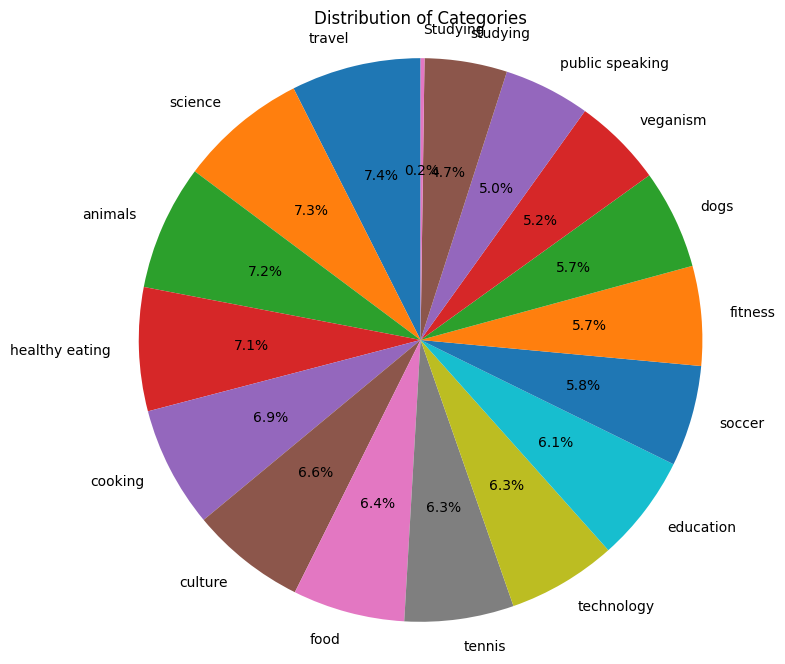

In [29]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

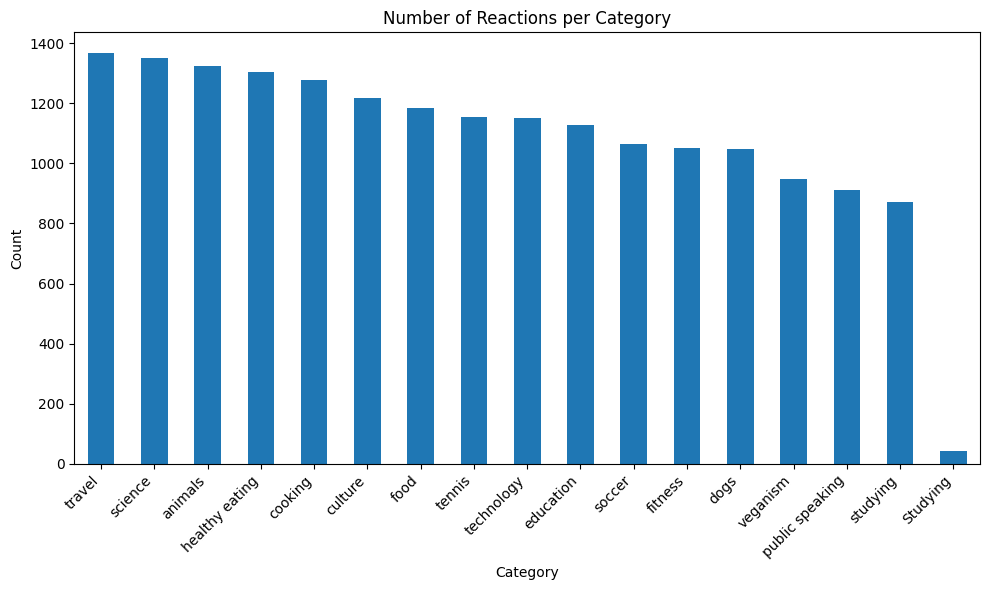

In [30]:
# Create the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Reactions per Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

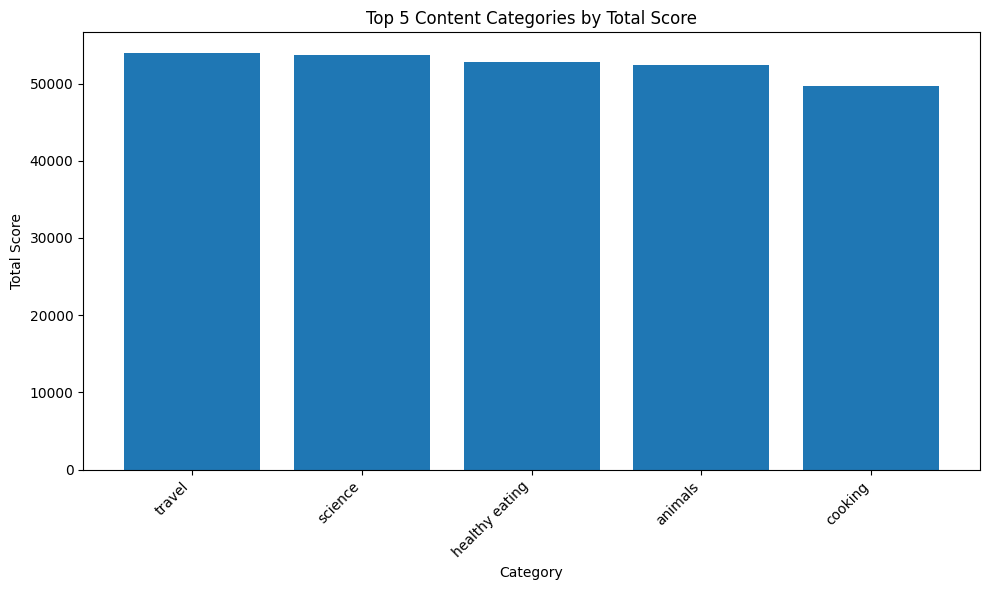

In [37]:
# prompt: top 5 content categories. Have a think about what are the best ways to present this? In a pie chart? In a bar chart?

# Assuming 'top_categories' DataFrame is already created as in your previous code

# Create the bar chart for the top 5 categories
plt.figure(figsize=(10, 6))
plt.bar(top_categories['Category'], top_categories['Score'])
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.title('Top 5 Content Categories by Total Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

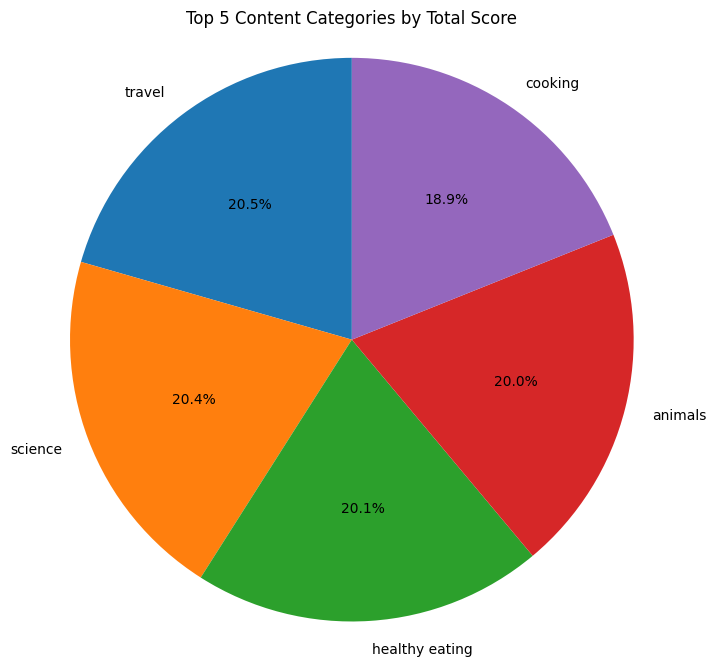

In [38]:
# Create the pie chart for the top 5 categories
plt.figure(figsize=(8, 8))
plt.pie(top_categories['Score'], labels=top_categories['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Content Categories by Total Score')
plt.axis('equal')
plt.show()

In [32]:
# prompt: How many reactions are there to the most popular category?

# Assuming 'final_merged_data' DataFrame from the previous code is available

# Group by category and count the number of reactions
category_reactions = final_merged_data.groupby('Category')['Score'].count().reset_index()

# Find the category with the most reactions
most_popular_category = category_reactions.loc[category_reactions['Score'].idxmax()]

# Print the result
print(f"The most popular category is '{most_popular_category['Category']}' with {most_popular_category['Score']} reactions.")


The most popular category is 'travel' with 1368 reactions.


In [35]:
# prompt: What was the month with the most posts?

# Convert the 'Datetime' column to datetime objects
final_merged_data['Datetime'] = pd.to_datetime(final_merged_data['Datetime'])

# Extract the month from the 'Datetime' column
final_merged_data['Month'] = final_merged_data['Datetime'].dt.month

# Group by month and count the number of posts
monthly_posts = final_merged_data.groupby('Month')['Content ID'].count()

# Find the month with the most posts
month_with_most_posts = monthly_posts.idxmax()

# Print the result
print(f"The month with the most posts is: {month_with_most_posts}")

The month with the most posts is: 8


In [34]:
# prompt: How many unique categories are there?

# Assuming 'cleaned_data' DataFrame from the previous code is available

# Calculate the number of unique categories
num_unique_categories = cleaned_data['Category'].nunique()

# Print the result
print(f"There are {num_unique_categories} unique categories.")


There are 17 unique categories.
